In [1]:
!pip install matplotlib -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.3.0 requires xgboost>=1.7.1, but you have xgboost 1.6.2 which is incompatible.
dtreeviz 2.2.1 requires graphviz>=0.9, but you have graphviz 0.8.4 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
ydata-profiling 4.8.3 requires matplotlib<3.9,>=3.2, but you have matplotlib 3.9.4 which is incompatible.
ydata-profiling 4.8.3 requires pydantic>=2, but you have pydantic 1.10.21 which is incompatible.


In [28]:
# Import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Regressão Linear Simples

In [13]:
df_brands = pd.DataFrame(
    {
        'brand': ['Coca-cola','Pepsi-cola','Coca-cola Light','Sprite','Dr. Pepper','Mountain Dew','7-up'],
        'advertising_spend': [131.3,92.4,60.4,55.7,40.2,29.0,11.6],
        'sales': [1929.2,1384.6,811.4,541.5,536.9,535.6,219.5]
    }
)
df_brands

,brand,advertising_spend,sales
0,Coca-cola,131.3,1929.2
1,Pepsi-cola,92.4,1384.6
2,Coca-cola Light,60.4,811.4
3,Sprite,55.7,541.5
4,Dr. Pepper,40.2,536.9
5,Mountain Dew,29.0,535.6
6,7-up,11.6,219.5


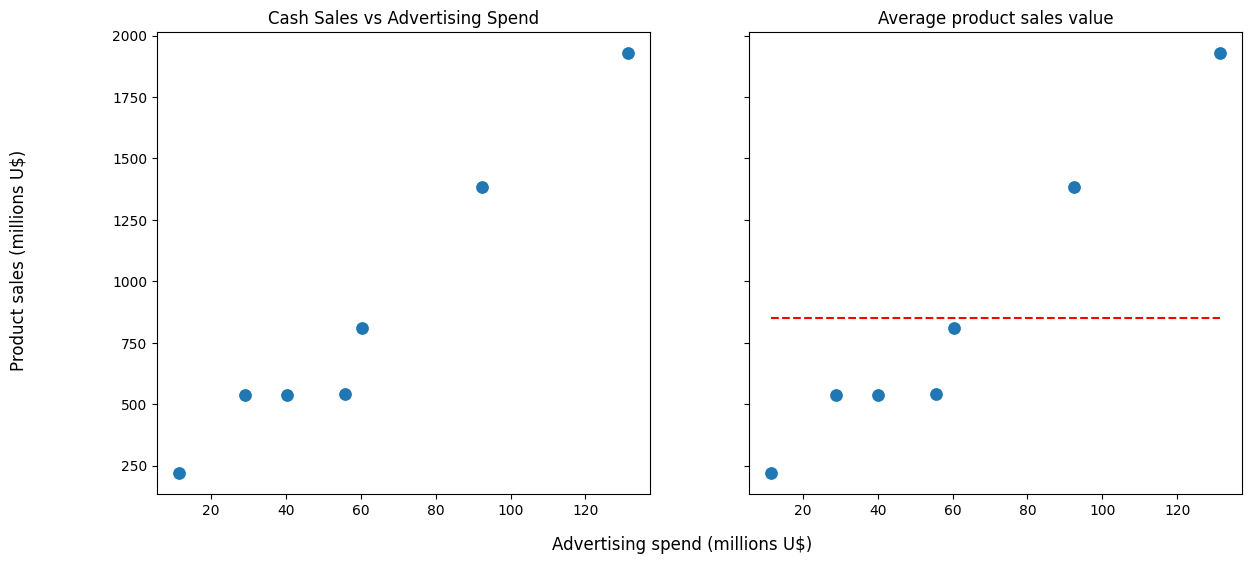

In [14]:
# subplots and a blank sheet that will be filled with graphs
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14, 6))
sns.scatterplot(x=df_brands.advertising_spend, y=df_brands.sales, ax=axes[0], s=100);

# title, xlabel and ylabel for first graph
axes[0].set_title('Cash Sales vs Advertising Spend')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

sns.scatterplot(x=df_brands.advertising_spend, y=df_brands.sales, ax=axes[1], s=100);
sns.lineplot(x=df_brands.advertising_spend, y=df_brands.sales.mean(), ax=axes[1], linestyle='--', color='red')

# title, xlabel and ylabel for second graph
axes[1].set_title('Average product sales value')
axes[1].set_xlabel('')
axes[1].set_ylabel('')


fig.supxlabel('Advertising spend (millions U$)')
fig.supylabel('Product sales (millions U$)');

In [15]:
X = df_brands.filter(['advertising_spend']).copy()
y = df_brands['sales'].copy()

In [16]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [17]:
lr.intercept_

-15.420436321709303

In [18]:
lr.coef_

array([14.42378282])

In [19]:
y_pred = lr.predict(X)
y_pred

array([1878.42224799, 1317.33709628,  855.77604603,  787.98426677,
        564.41563306,  402.86926547,  151.89544439])

In [20]:
# dashed line, predicted
(y - y_pred)**2

0     2578.380099
1     4524.298217
2     1969.233461
3    60754.493767
4      757.110063
5    17617.447889
6     4570.375939
Name: sales, dtype: float64

In [21]:
((y - y_pred)**2).sum()

92771.33943366463

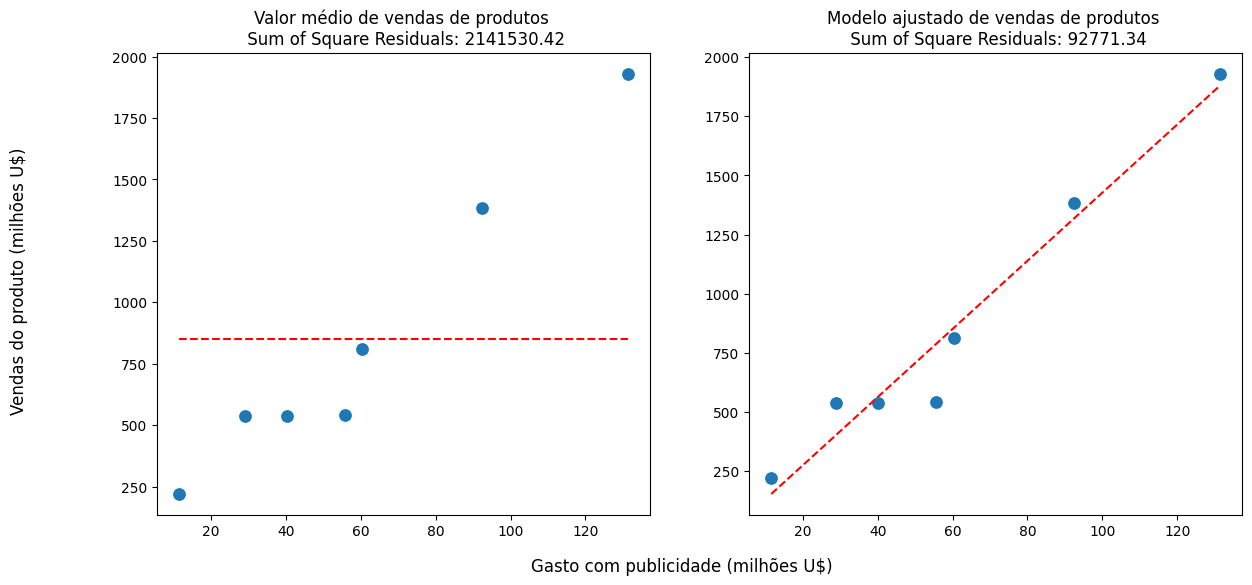

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(14, 6))

sns.scatterplot(x=df_brands.advertising_spend, y=df_brands.sales, ax=axes[0], s=100);
sns.lineplot(x=df_brands.advertising_spend, y=df_brands.sales.mean(), ax=axes[0], linestyle='--', color='red')

ssr_avg = sum((df_brands.sales.mean() - y) ** 2)
axes[0].set_title(f'Valor médio de vendas de produtos \n Sum of Square Residuals: {ssr_avg:.2f}')
axes[0].set_xlabel('')
axes[0].set_ylabel('')


sns.scatterplot(x=df_brands.advertising_spend, y=df_brands.sales, ax=axes[1], s=100);
sns.lineplot(x=df_brands.advertising_spend, y=y_pred, ax=axes[1], linestyle='--', color='red')

ssr_model = sum((y - y_pred) ** 2)
axes[1].set_title(f'Modelo ajustado de vendas de produtos \n Sum of Square Residuals: {ssr_model:.2f}')
axes[1].set_xlabel('')
axes[1].set_ylabel('')


fig.supxlabel('Gasto com publicidade (milhões U$)')
fig.supylabel('Vendas do produto (milhões U$)');


In [24]:
print(lr.predict([[20], [30]]))

[273.05522009 417.29304829]


/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
eq_total_sales = lambda b0, b1, x1: round(b0 + (b1 * x1), 2)

In [26]:
eq_total_sales(b0=lr.intercept_, b1=lr.coef_[0], x1=20)

273.06

In [27]:
lr.predict([[20]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([273.05522009])

In [29]:
r2_score(y, y_pred)

0.9566798871073536

In [ ]:
#